C:\Users\srdee\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


F1 score: 0.40816326530612246


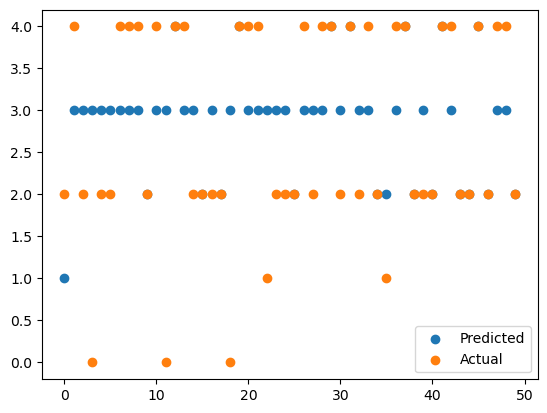

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score

a = pd.read_csv("seattle-weather.csv")
a = a.drop(['date'], axis=1)

l = LabelEncoder()
a["w"] = l.fit_transform(a["weather"])
a = a.drop(["weather"], axis=1)

x = a[["precipitation", "temp_max", "temp_min", "wind"]]
y = a["w"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=100)

m = LinearRegression()
m.fit(x_train, y_train)

m.predict([[8.6, 4.4, 1.7, 1.3]])
y_predict = m.predict(x_test).round(0)
y_test = y_test.round(0)

f1 = f1_score(y_test, y_predict, average='micro')
print("F1 score:", f1)

i = np.array(range(50))
plt.scatter(i, y_predict[0:50], label='Predicted')
plt.scatter(i, y_test[0:50], label='Actual')
plt.legend()
plt.show()
